# 1. Introduction to Prevalence & Probability Density Functions (PDFs)

## The Problem with Simple Numbers

When we talk about health conditions in a population, we often use single numbers like "the prevalence of diabetes is 6%." This is a useful starting point, but it hides a huge amount of detail. It doesn't tell us about:

- **Severity**: Are most of those cases mild or severe?
- **Variation**: How does the prevalence change with age, location, or deprivation?
- **Uncertainty**: How confident are we in that single number?

Relying on a single average value for planning diagnostic services can lead to misallocation of resources. We might under-prepare for the small number of highly complex patients or over-serve areas with predominantly mild conditions.

## A Better Approach: Probability Density Functions (PDFs)

A **Probability Density Function (PDF)** gives us a complete picture of the distribution of a condition. Instead of one number, we get a curve that shows the likelihood of every possible value.

- **Peak of the PDF**: Shows the most common or likely value (the 'mode').
- **Tails of the PDF**: Represent the rare but often high-risk values (e.g., severe disease).
- **Area Under the Curve**: Represents the proportion of the population. We can calculate the area under a specific part of the curve to estimate how many people fall into a category (e.g., 'high risk').

In the context of NHS South West, which has older, more rural, and in some parts more deprived populations, we expect to see **right-skewed** or **long-tailed** distributions. This means that while most people might have mild conditions, there is a larger-than-average tail of people with severe, complex needs.

### Setup
Let's import the libraries we'll need for our analysis and visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

### Visualizing a Simple Average vs. a PDF

Let's imagine a health score for a population of 10,000 people. A simple approach gives us one number. A PDF gives us the full story.

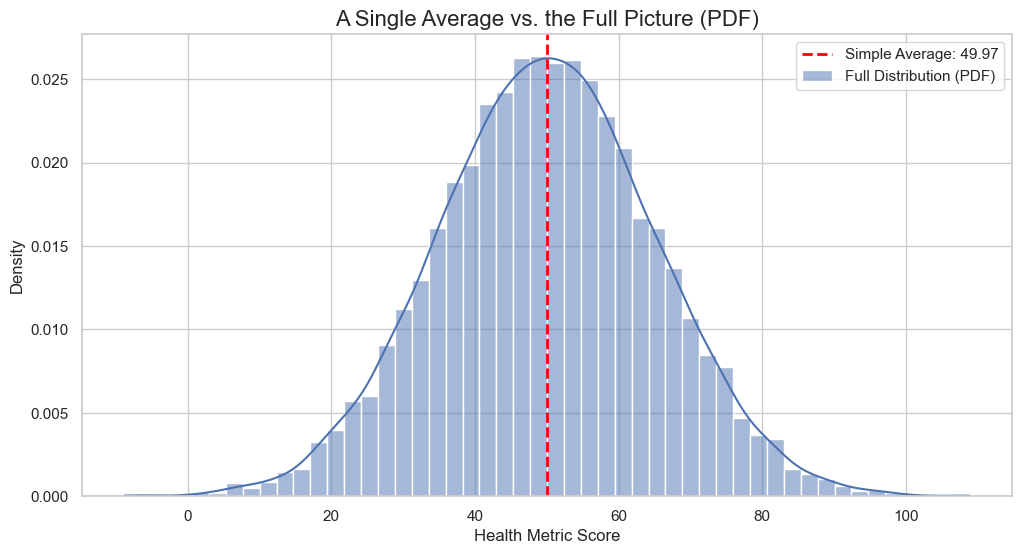

In [2]:
# Create synthetic data for a health metric (e.g., a risk score)
np.random.seed(42)
health_metric_normal = np.random.normal(loc=50, scale=15, size=10000)

# The 'simple number' approach: the mean
mean_value = np.mean(health_metric_normal)

plt.figure(figsize=(12, 6))
sns.histplot(health_metric_normal, bins=50, kde=True, stat="density", label='Full Distribution (PDF)')
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Simple Average: {mean_value:.2f}')

plt.title('A Single Average vs. the Full Picture (PDF)', fontsize=16)
plt.xlabel('Health Metric Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

### The Importance of Shape: Normal vs. Skewed Distributions

Many health-related datasets are not perfectly symmetrical (or 'Normal'). They are often skewed. For example, most of the population might be healthy (a high peak at the 'good' end of the scale), with a long tail of individuals with progressively worse health.

Let's simulate a **right-skewed** distribution using a Beta distribution, which is perfect for values bounded between two points (like a frailty score from 0 to 1). This shape is much more likely for phenomena like frailty or LTC counts in the real world.

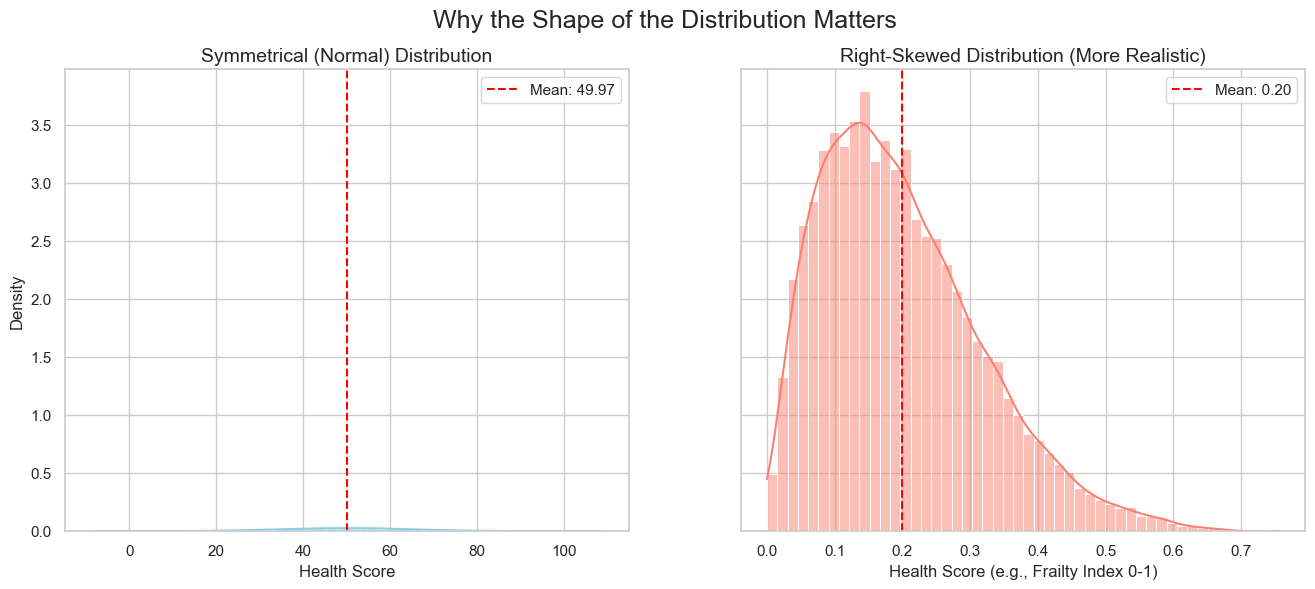

Notice how the mean (0.20) in the skewed distribution is pulled towards the long tail.
It doesn't represent the most common value (the peak).


In [3]:
# Parameters for a Beta distribution to create a right skew (most values are low)
# a < b gives a right skew
a, b = 2, 8
health_metric_skewed = stats.beta.rvs(a, b, size=10000, random_state=42)

mean_skewed = np.mean(health_metric_skewed)

# Plotting the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Normal Distribution
sns.histplot(health_metric_normal, bins=50, kde=True, stat="density", ax=ax1, color='skyblue')
ax1.axvline(np.mean(health_metric_normal), color='red', linestyle='--', label=f'Mean: {np.mean(health_metric_normal):.2f}')
ax1.set_title('Symmetrical (Normal) Distribution', fontsize=14)
ax1.set_xlabel('Health Score')
ax1.set_ylabel('Density')
ax1.legend()

# Skewed Distribution
sns.histplot(health_metric_skewed, bins=50, kde=True, stat="density", ax=ax2, color='salmon')
ax2.axvline(mean_skewed, color='red', linestyle='--', label=f'Mean: {mean_skewed:.2f}')
ax2.set_title('Right-Skewed Distribution (More Realistic)', fontsize=14)
ax2.set_xlabel('Health Score (e.g., Frailty Index 0-1)')
ax2.legend()

plt.suptitle('Why the Shape of the Distribution Matters', fontsize=18)
plt.show()

print(f"Notice how the mean ({mean_skewed:.2f}) in the skewed distribution is pulled towards the long tail.")
print("It doesn't represent the most common value (the peak).")

## Conclusion

We've seen that using a full probability distribution provides a much richer, more accurate view of population health than a single average. The shape of this distribution—especially its skewness—is critical for understanding where the real healthcare needs lie.

In the next notebook, we will apply this thinking to a specific, crucial concept: **frailty**.